<a href="https://colab.research.google.com/github/Krishipatel15/PRODIGY_DS/blob/main/PRODIGY_DS_TASK_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRODIGY_DS_TASK-03

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate Synthetic Dataset

In [3]:
n_samples = 10000
n_features = 20

X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=10, n_redundant=5, random_state=42)

feature_names = [f'feature_{i}' for i in range(n_features)]
data = pd.DataFrame(X, columns=feature_names)
data['y'] = y

data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,y
0,1.716809,0.413473,-1.142711,-4.066260,0.938451,0.038839,-4.540817,-1.254791,-0.193970,-0.688750,...,0.700254,-0.136394,0.693104,1.176857,2.607634,-1.442199,0.370059,0.410418,1.393320,0
1,-1.368954,1.111770,2.869476,-2.498132,-1.120054,0.754516,-1.267701,3.345535,0.749588,0.168166,...,-0.967787,-1.781184,2.995910,-2.391062,1.604645,-3.333805,0.564148,-0.261230,0.813225,0
2,0.759312,-0.510734,-2.390418,2.409896,1.501392,-0.873810,-6.496016,0.868606,0.615703,-1.638742,...,0.338684,-1.004616,1.034466,-0.777793,0.284227,0.180186,-0.578496,5.205765,-5.856392,1
3,-1.009038,-0.480800,0.315540,0.446048,-1.144810,-0.405710,0.579251,0.856778,-0.356384,0.196944,...,0.780678,-0.758420,2.708998,2.263560,-3.783364,-2.847176,4.156560,-2.546281,4.842346,0
4,-3.177266,-0.201135,3.944940,0.035339,2.874406,-0.145875,-0.676539,-0.620758,-1.348492,-0.033042,...,-0.540126,-3.166363,-1.913751,-0.530034,0.439345,0.363084,-2.457581,-0.025816,-2.516978,1


# Preprocess the Data

In [4]:
data['cat_feature_1'] = np.random.choice(['A', 'B', 'C'], size=n_samples)
data['cat_feature_2'] = np.random.choice(['X', 'Y', 'Z'], size=n_samples)

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop(columns=['y'])
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier

In [5]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Evaluate the Model

Accuracy: 0.85
Confusion Matrix:
[[1286  233]
 [ 217 1264]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1519
           1       0.84      0.85      0.85      1481

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



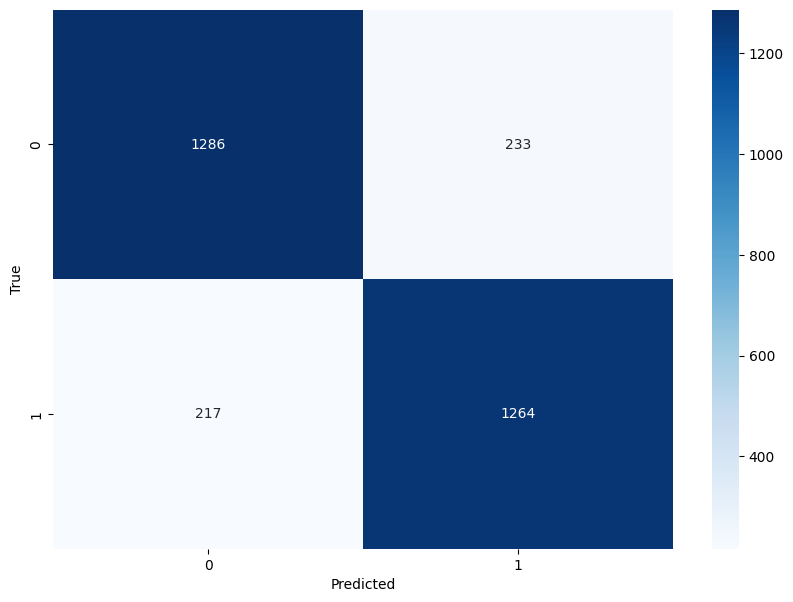

In [6]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()